In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import h5py
import matplotlib.gridspec as gridspec

In [3]:
with h5py.File("../../../Results/nh2_dataset/naive_kfold_stats.h5", "r") as seg_perf:
    number_of_train_spine_pixels_nkf = np.array(seg_perf.get("number_of_train_spine_pixels"))
    number_of_test_spine_pixels_nkf = np.array(seg_perf.get("number_of_test_spine_pixels"))
with h5py.File("../../../Results/nh2_dataset/random_kfold_stats.h5", "r") as seg_perf:
    number_of_train_spine_pixels_rkf = np.array(seg_perf.get("number_of_train_spine_pixels"))
    number_of_test_spine_pixels_rkf = np.array(seg_perf.get("number_of_test_spine_pixels"))
k = number_of_test_spine_pixels_rkf.shape[0]

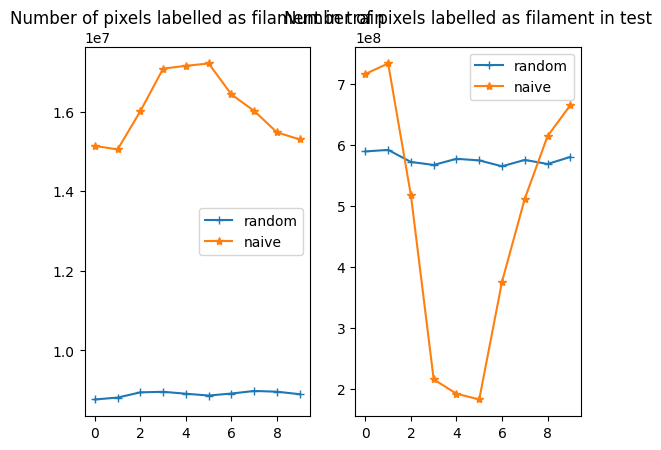

In [15]:
G = gridspec.GridSpec(1, 2)
axes_1 = plt.subplot(G[0, 0])

axes_1.plot(np.linspace(0,k - 1, k), number_of_train_spine_pixels_rkf, label="random", marker="+")
axes_1.plot(np.linspace(0,k - 1, k), number_of_train_spine_pixels_nkf, label="naive", marker="*")
axes_1.set_title("Number of pixels labelled as filament in train")
axes_1.legend()

axes_2 = plt.subplot(G[0, 1])
axes_2.plot(np.linspace(0,k - 1, k), number_of_test_spine_pixels_rkf, label="random", marker="+")
axes_2.plot(np.linspace(0,k - 1, k), number_of_test_spine_pixels_nkf, label="naive", marker="*")
axes_2.set_title("Number of pixels labelled as filament in test")
axes_2.legend()
plt.show()

In [2]:
density_file = "/home/loris/PhD/Dev/Datasets/nh2_dataset/merged/density_merged.fits"
density_image = fits.getdata(density_file)
density = density_image[density_image > 0]
print(density.max(), density.min())

3.367595174607165e+23 4.160104636600882e+20


In [9]:
spine_file = "/home/loris/PhD/Dev/Datasets/nh2_dataset/merged/spine_merged.fits"
spine_image = fits.getdata(spine_file)
idx = np.isnan(spine_image)
tmp = spine_image.copy()
tmp[idx] = 0
print(tmp.sum())

background_file = "/home/loris/PhD/Dev/Datasets/nh2_dataset/merged/background_merged.fits"
background_image = fits.getdata(background_file)
idx = np.isnan(background_image)
tmp = background_image.copy()
tmp[idx] = 0
print(tmp.sum())

tmp = spine_image.copy()
idx = tmp == 1
tmp[idx] = -1
idx = np.isnan(spine_image)
tmp[idx] = -1
tmp += 1
print(tmp.sum())

4627689.0
5865799.0
183472311.0


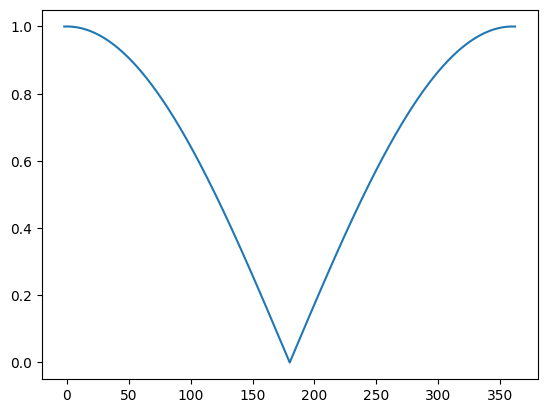

In [35]:
positions = np.linspace(0, 114000, 114000)
pe = np.absolute(np.cos(((57000 - positions) * 0.00319444444400 + 180) * np.pi / 360))
plt.plot(((57000 - positions) * 0.00319444444400 + 180), pe)
plt.show()

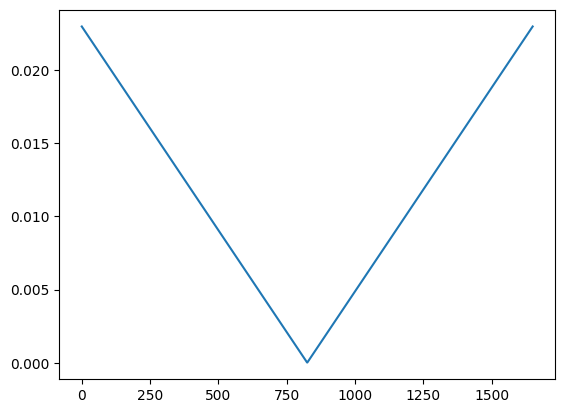

In [4]:
positions = np.linspace(0, 1650, 1650)
pe = np.absolute(np.sin(((825 - positions) * 0.00319444444400 + 0) * np.pi / 360))
plt.plot(positions, pe)
plt.show()

In [3]:
import numpy as np
from math import factorial

def savitzky_golay(y, window_size, order, deriv=0, rate=1):
    r"""Smooth (and optionally differentiate) data with a Savitzky-Golay filter.
    The Savitzky-Golay filter removes high frequency noise from data.
    It has the advantage of preserving the original shape and
    features of the signal better than other types of filtering
    approaches, such as moving averages techniques.
    Parameters
    ----------
    y : array_like, shape (N,)
    the values of the time history of the signal.
    window_size : int
    the length of the window. Must be an odd integer number.
    order : int
    the order of the polynomial used in the filtering.
    Must be less then `window_size` - 1.
    deriv: int
    the order of the derivative to compute (default = 0 means only smoothing)
    Returns
    -------
    ys : ndarray, shape (N)
    the smoothed signal (or it's n-th derivative).
    Notes
    -----
    The Savitzky-Golay is a type of low-pass filter, particularly
    suited for smoothing noisy data. The main idea behind this
    approach is to make for each point a least-square fit with a
    polynomial of high order over a odd-sized window centered at
    the point.
    Examples
    --------
    t = np.linspace(-4, 4, 500)
    y = np.exp( -t**2 ) + np.random.normal(0, 0.05, t.shape)
    ysg = savitzky_golay(y, window_size=31, order=4)
    import matplotlib.pyplot as plt
    plt.plot(t, y, label='Noisy signal')
    plt.plot(t, np.exp(-t**2), 'k', lw=1.5, label='Original signal')
    plt.plot(t, ysg, 'r', label='Filtered signal')
    plt.legend()
    plt.show()
    References
    ----------
    .. [1] A. Savitzky, M. J. E. Golay, Smoothing and Differentiation of
    Data by Simplified Least Squares Procedures. Analytical
    Chemistry, 1964, 36 (8), pp 1627-1639.
    .. [2] Numerical Recipes 3rd Edition: The Art of Scientific Computing
    W.H. Press, S.A. Teukolsky, W.T. Vetterling, B.P. Flannery
    Cambridge University Press ISBN-13: 9780521880688
    """

    try:
        window_size = np.abs(np.int(window_size))
        order = np.abs(np.int(order))
    except ValueError:
        raise ValueError("window_size and order have to be of type int")
    if window_size % 2 != 1 or window_size < 1:
        raise TypeError("window_size size must be a positive odd number")
    if window_size < order + 2:
        raise TypeError("window_size is too small for the polynomials order")
    order_range = range(order+1)
    half_window = (window_size -1) // 2
    # precompute coefficients
    b = np.mat([[k**i for i in order_range] for k in range(-half_window, half_window+1)])
    m = np.linalg.pinv(b).A[deriv] * rate**deriv * factorial(deriv)
    # pad the signal at the extremes with
    # values taken from the signal itself
    firstvals = y[0] - np.abs( y[1:half_window+1][::-1] - y[0] )
    lastvals = y[-1] + np.abs(y[-half_window-1:-1][::-1] - y[-1])
    y = np.concatenate((firstvals, y, lastvals))
    return np.convolve( m[::-1], y, mode='valid')

/tmp/ipykernel_9445/3155531016.py:54: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  window_size = np.abs(np.int(window_size))
/tmp/ipykernel_9445/3155531016.py:55: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumP

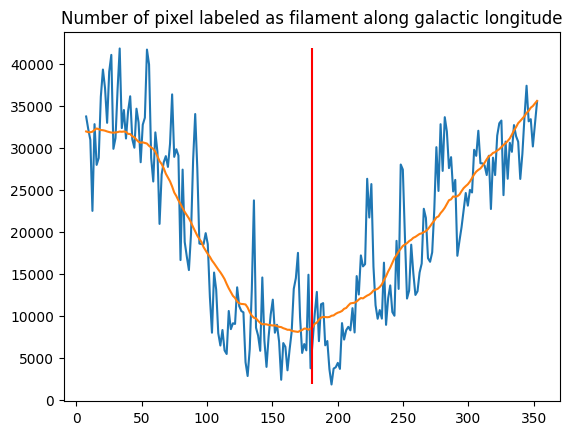

In [15]:
groundtruth_file = "/home/loris/PhD/Dev/Datasets/nh2_dataset/merged/spine_merged.fits"
groundtruth_image = fits.getdata(groundtruth_file)
idx = np.isnan(groundtruth_image)
groundtruth_image[idx] = 0
groundtruth_image = groundtruth_image[:, 3000 : -3000].copy()
n = groundtruth_image.shape[1]
band_width = 500
nb_of_bands = int(n / band_width)
lat = np.linspace((57000 - 111000) * 0.00319444444400 + 180, (57000 - 3000) * 0.00319444444400 + 180, nb_of_bands)
tmp = groundtruth_image.copy()
stats = np.array([tmp[:, i * band_width : (i + 1) * band_width].sum() for i in range(nb_of_bands)])
smooth_stats = savitzky_golay(stats, 51, 1)
plt.plot(lat, stats)
plt.plot(lat, smooth_stats)
plt.vlines(180, ymin=stats.min(), ymax=stats.max(), color="r")
plt.title("Number of pixel labeled as filament along galactic longitude")
plt.show()

1650


/tmp/ipykernel_10502/3155531016.py:54: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  window_size = np.abs(np.int(window_size))
/tmp/ipykernel_10502/3155531016.py:55: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in Nu

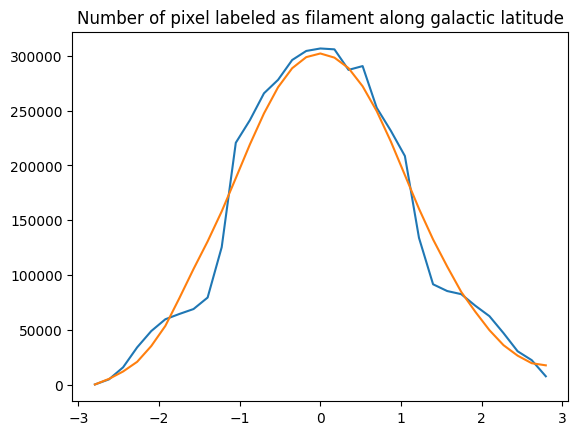

In [4]:
groundtruth_file = "/home/loris/PhD/Dev/Datasets/nh2_dataset/merged/spine_merged.fits"
groundtruth_image = fits.getdata(groundtruth_file)
idx = np.isnan(groundtruth_image)
groundtruth_image[idx] = 0
n = groundtruth_image.shape[0]
print(n)
band_width = 50
nb_of_bands = int(n / band_width)
lat = np.linspace((-875) * 0.00319444444400 , (875) * 0.00319444444400 , nb_of_bands)
tmp = groundtruth_image.copy()
stats = np.array([tmp[i * band_width : (i + 1) * band_width, :].sum() for i in range(nb_of_bands)])
smooth_stats = savitzky_golay(stats, 31, 4)
plt.plot(lat, stats)
plt.plot(lat, smooth_stats)
plt.title("Number of pixel labeled as filament along galactic latitude")
plt.show()

In [33]:
pe = np.zeros((1000,1024,2,1))
print(pe.shape)

(1000, 1024, 2, 1)


In [36]:
pe_1d = np.array([1,1])
pe = np.array([[pe_1d for _ in range(1024)] for _ in range(1000)])
print(pe.shape)

(1000, 1024, 2)


In [43]:
pos = np.array([[0, 1], [2, 3]])
print(pos.shape)
print(pos[:, 1])

(2, 2)
[1 3]
